In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam# Preparing The Data

# Splitting Data 70% train, 15% validation, 15% testing

In [2]:

"""
pip install split-folders
"""

import splitfolders  # or import split_folders

input_folder = 'basedata/Natural_and_Spam'

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
#Train, val, test
splitfolders.ratio(input_folder, output='basedata/Natural_and_Spam_SPLITTED', 
                   seed=42, ratio=(.7, .15, .15), 
                   group_prefix=None) # default values


# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
# # enable oversampling of imbalanced datasets, works only with fixed
# splitfolders.fixed(input_folder, output="cell_images2", 
#                  # Preparing The Data  seed=42, fixed=(35, 20), 
#                    oversample=False, group_prefix=None) 


Copying files: 1739 files [00:00, 2529.42 files/s]


# Preparing The Data

In [3]:
import pathlib
data_dir = 'basedata/Natural_and_Spam'
data_dir = pathlib.Path(data_dir)
print(data_dir)

basedata/Natural_and_Spam


basedata/Natural_and_Spam/NaturalImages/zzz_407666284_6ebd1325fc_m.jpg


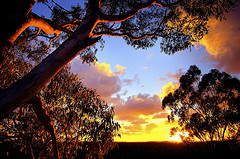

In [4]:
roses = list(data_dir.glob('NaturalImages/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [5]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'basedata/Natural_and_Spam_SPLITTED/train',
  #validation_split=0.2,
  #subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1217 files belonging to 2 classes.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'basedata/Natural_and_Spam_SPLITTED/val',
  #validation_split=0.2,
  #subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 260 files belonging to 2 classes.


In [7]:
class_names = train_ds.class_names
print(class_names)

['NaturalImages', 'SpamImages']


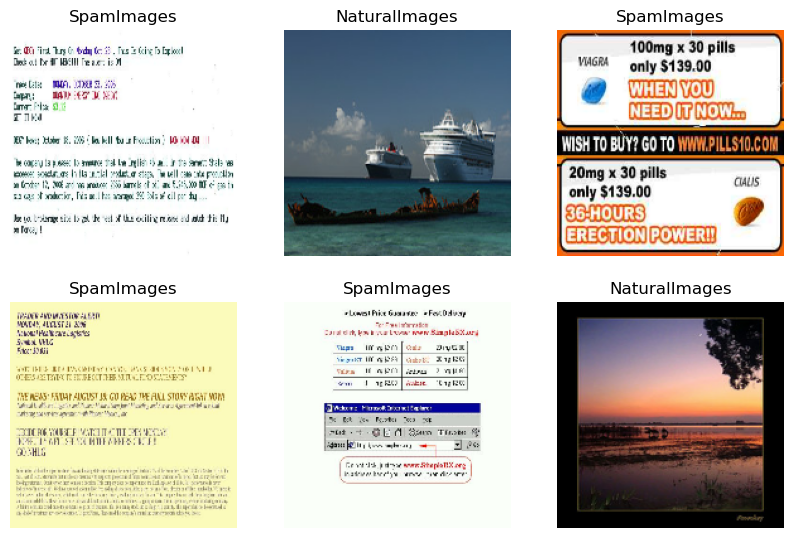

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Training The Model

In [9]:
inception_model = Sequential()

pretrained_model= tf.keras.applications.InceptionV3(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

inception_model.add(pretrained_model)
inception_model.add(Flatten())
inception_model.add(Dense(512, activation='relu'))
inception_model.add(Dense(2, activation='softmax'))

In [10]:
inception_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 2)                 1026      
 apper)                                                          
                                                                 
Total params: 22852898 (87.18 MB)
Trainable params: 1050114 (4.01 MB)
Non-trainable params: 21802784 (83.17 MB)
__________

In [11]:
inception_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
epochs=20
history = inception_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
39/39 [==============================] - 11s 290ms/step - loss: 0.2022 - accuracy: 0.9729 - val_loss: 0.7941 - val_accuracy: 0.9231
Epoch 2/20
39/39 [==============================] - 12s 295ms/step - loss: 0.8777 - accuracy: 0.9491 - val_loss: 1.0532 - val_accuracy: 0.9423
Epoch 3/20
39/39 [==============================] - 12s 304ms/step - loss: 0.5401 - accuracy: 0.9597 - val_loss: 9.2747 - val_accuracy: 0.6846
Epoch 4/20
39/39 [==============================] - 12s 299ms/step - loss: 1.9034 - accuracy: 0.9162 - val_loss: 0.8575 - val_accuracy: 0.9538
Epoch 5/20
39/39 [==============================] - 18s 467ms/step - loss: 0.3453 - accuracy: 0.9753 - val_loss: 0.4384 - val_accuracy: 0.9577
Epoch 6/20
39/39 [==============================] - 19s 480ms/step - loss: 0.1235 - accuracy: 0.9811 - val_loss: 0.4789 - val_accuracy: 0.9692
Epoch 7/20
39/39 [==============================] - 20s 519ms/step - loss: 0.1134 - accuracy: 0.9836 - val_loss: 0.8334 - val_accuracy: 0.9154

# Evaluating The Model

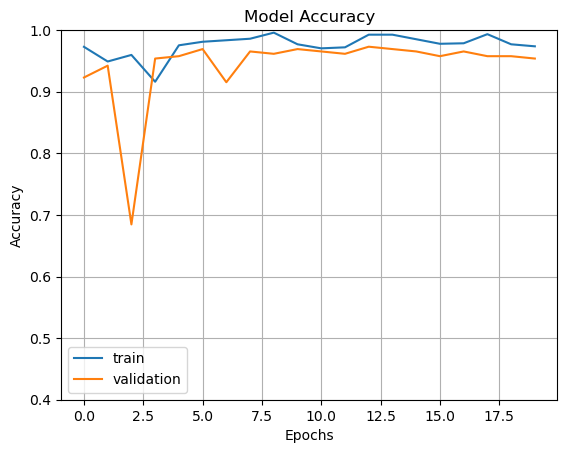

In [21]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

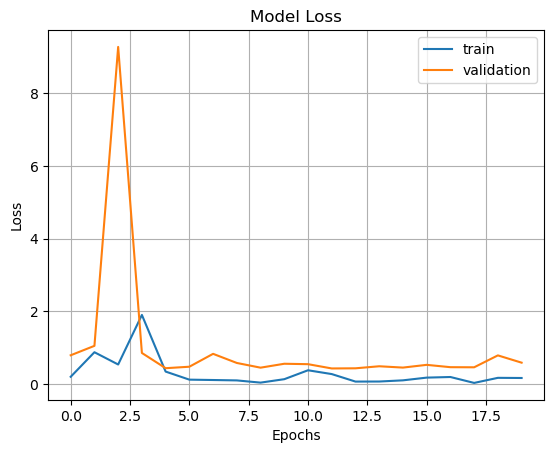

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions

basedata/Natural_and_Spam/NaturalImages/zzz_20596_81931be621_m.jpg
(1, 180, 180, 3)


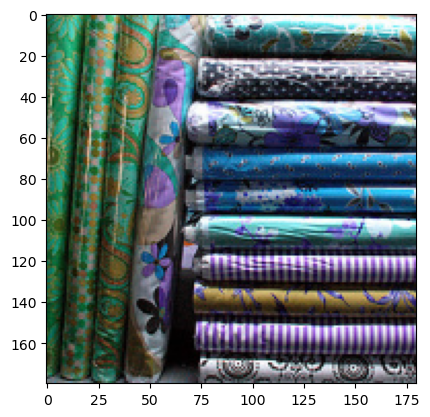

In [23]:
import cv2
image=cv2.imread(str(roses[1]))

print(str(roses[1]))
image_resized= cv2.resize(image, (img_height,img_width))
#print(image_resized)
image=np.expand_dims(image_resized,axis=0)
print(image.shape)
plt.imshow(image_resized)

In [24]:
pred=inception_model.predict(image)
print(pred)

1/1 [==============================] - 0s 69ms/step
[[1.0000000e+00 3.2046608e-26]]


In [25]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is NaturalImages


1/1 [==============================] - 0s 80ms/step
Image detected wrong at 10


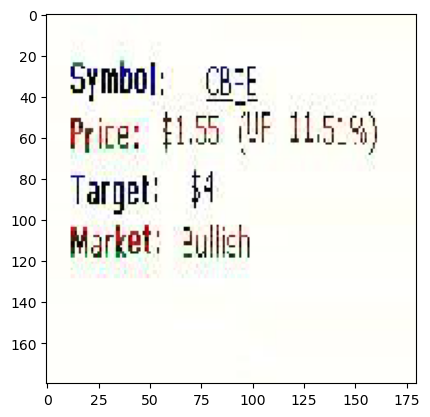

1/1 [==============================] - 0s 84ms/step
Image detected wrong at 12


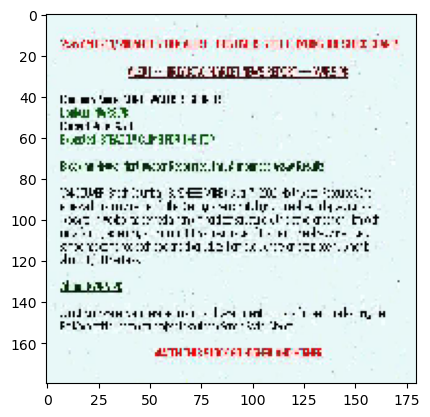

1/1 [==============================] - 0s 71ms/step
Image detected wrong at 19


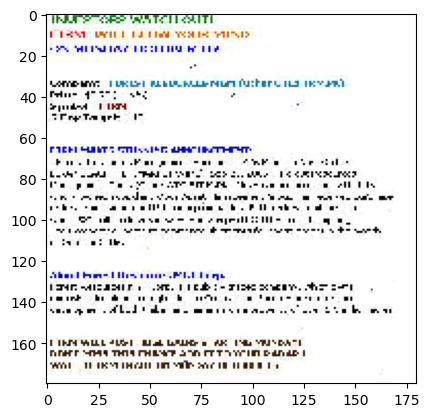

1/1 [==============================] - 0s 60ms/step
Image detected wrong at 24


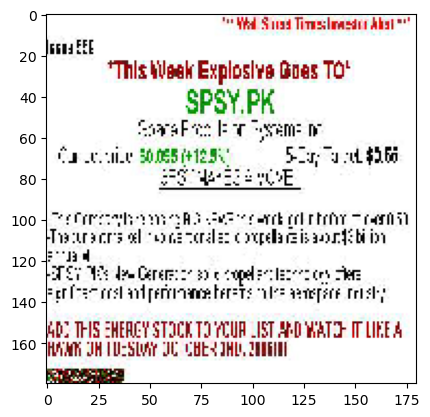

1/1 [==============================] - 0s 59ms/step
Image detected wrong at 28


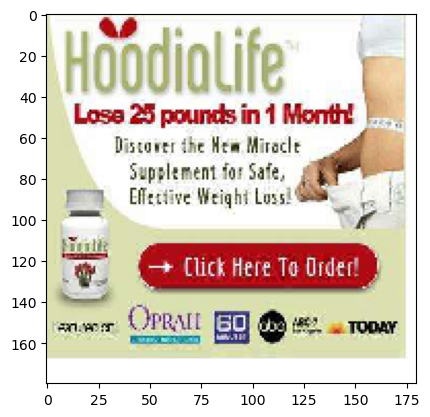

1/1 [==============================] - 0s 53ms/step
Image detected wrong at 29


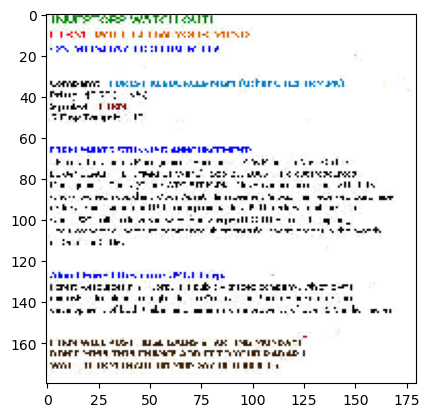

1/1 [==============================] - 0s 76ms/step
Image detected wrong at 42


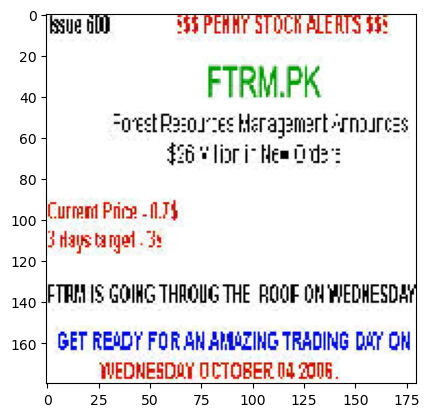

1/1 [==============================] - 0s 87ms/step
Image detected wrong at 44


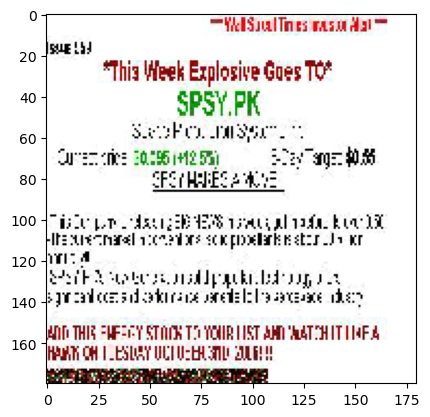

1/1 [==============================] - 0s 67ms/step
Image detected wrong at 50


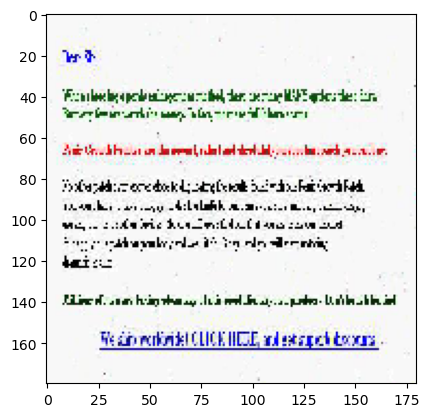

1/1 [==============================] - 0s 60ms/step
Image detected wrong at 58


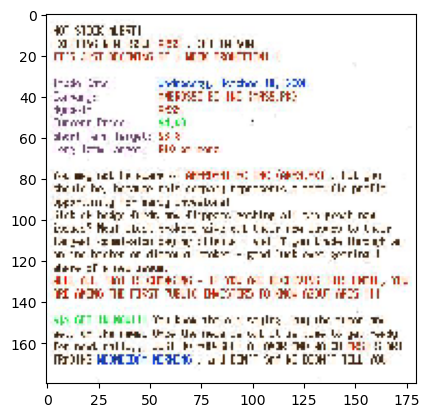

1/1 [==============================] - 0s 48ms/step
Image detected wrong at 71


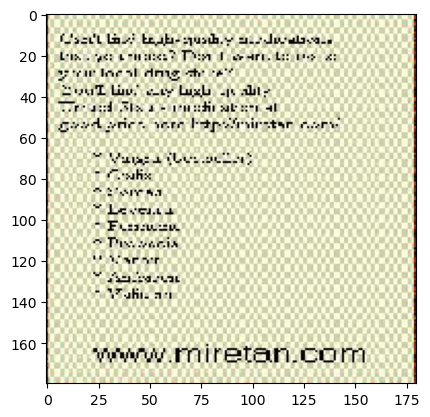

1/1 [==============================] - 0s 59ms/step
Image detected wrong at 73


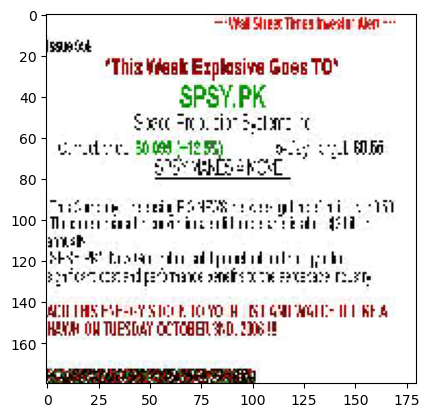

1/1 [==============================] - 0s 59ms/step
Image detected wrong at 85


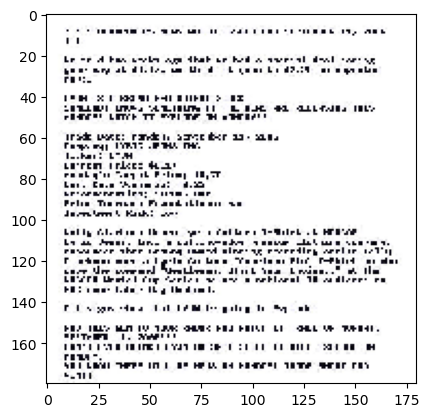

1/1 [==============================] - 0s 73ms/step
Image detected wrong at 88


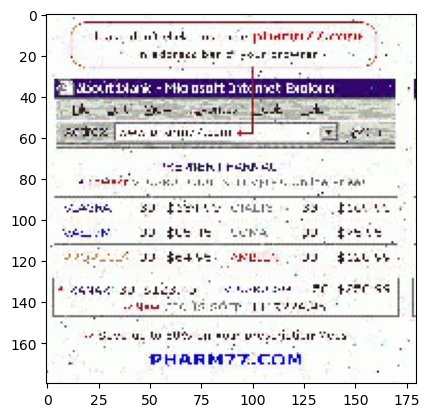

1/1 [==============================] - 0s 58ms/step
Image detected wrong at 89


1/1 [==============================] - 0s 52ms/step
Image detected wrong at 100


1/1 [==============================] - 0s 48ms/step
Image detected wrong at 107


1/1 [==============================] - 0s 70ms/step
Image detected wrong at 109


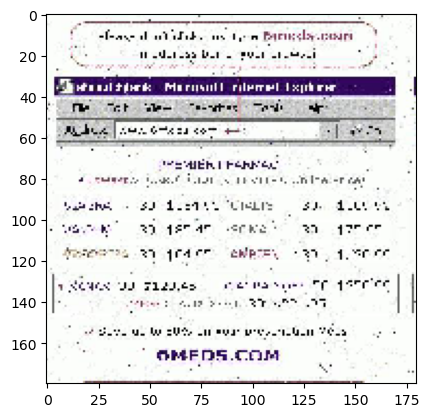

1/1 [==============================] - 0s 44ms/step
Image detected wrong at 110


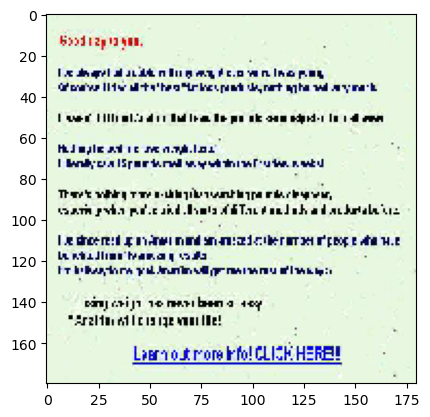

1/1 [==============================] - 0s 52ms/step
Image detected wrong at 111


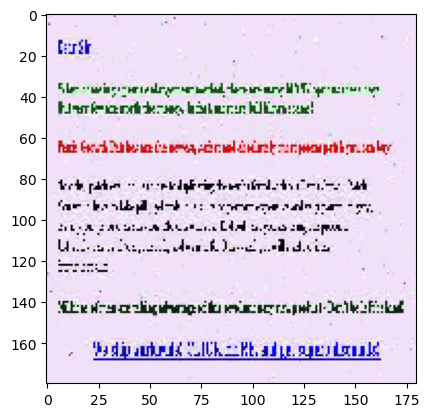

1/1 [==============================] - 0s 62ms/step
Image detected wrong at 113


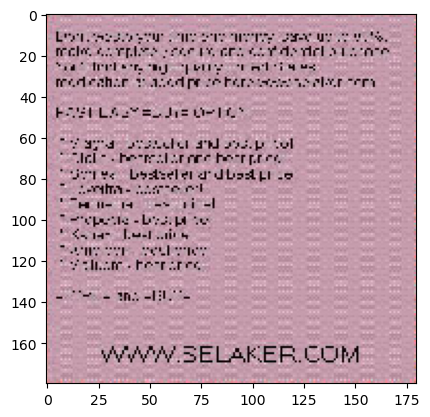

1/1 [==============================] - 0s 62ms/step
Image detected wrong at 124


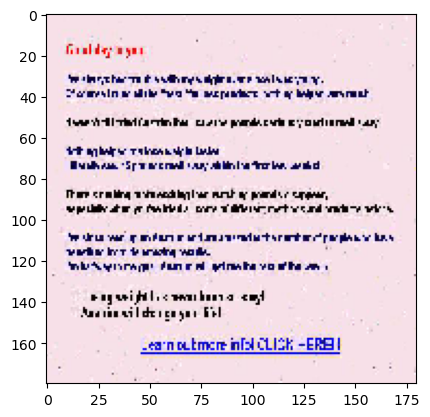

1/1 [==============================] - 0s 48ms/step
Image detected wrong at 127


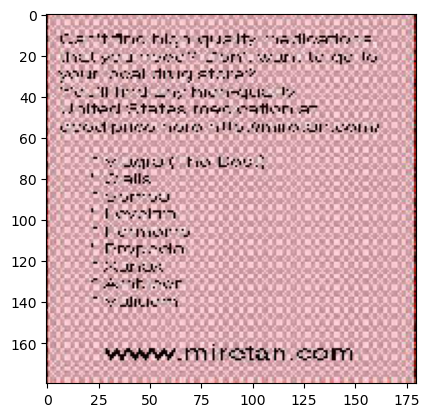

1/1 [==============================] - 0s 54ms/step
Image detected wrong at 130


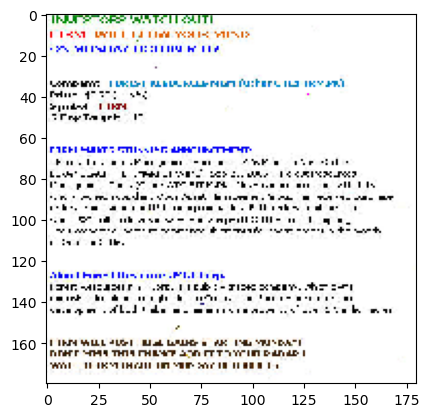

1/1 [==============================] - 0s 59ms/step
Image detected wrong at 137


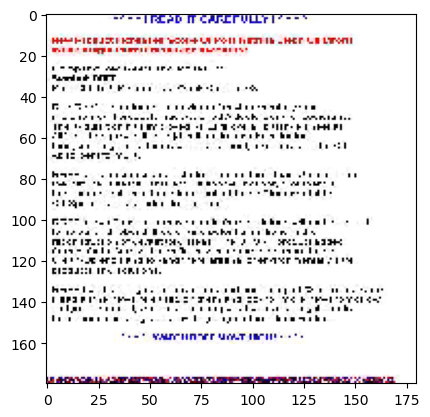

1/1 [==============================] - 0s 41ms/step
Image detected wrong at 140


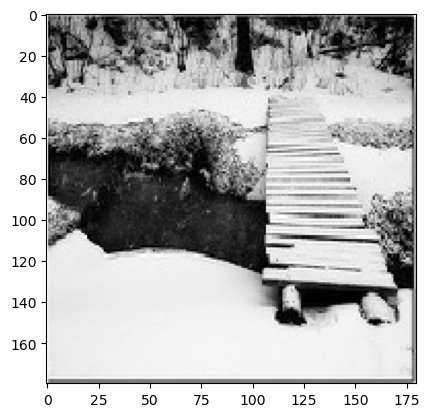

1/1 [==============================] - 0s 89ms/step
Image detected wrong at 168


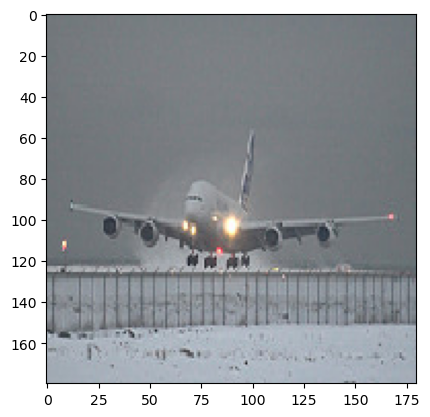

1/1 [==============================] - 0s 70ms/step
Image detected wrong at 173


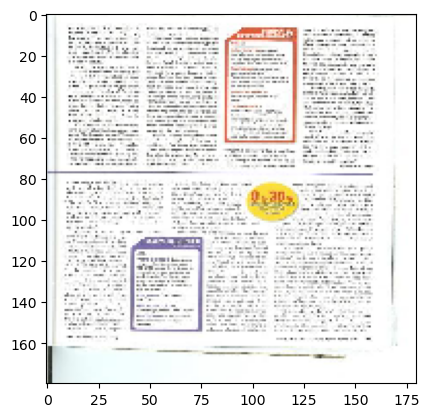

1/1 [==============================] - 0s 118ms/step
Image detected wrong at 174


1/1 [==============================] - 0s 48ms/step
Image detected wrong at 178


1/1 [==============================] - 0s 73ms/step
Image detected wrong at 198


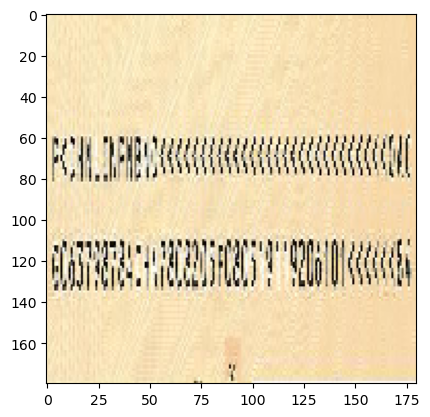

1/1 [==============================] - 0s 67ms/step
Image detected wrong at 218


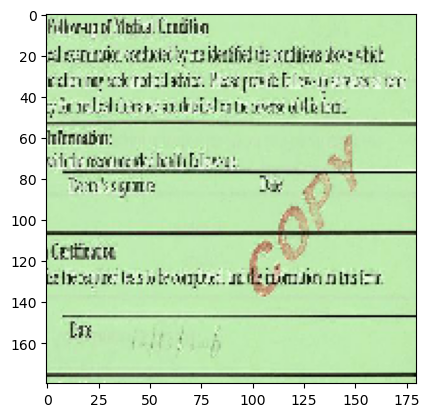

1/1 [==============================] - 0s 47ms/step
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [26]:
from tensorflow.keras.preprocessing import image

dir_path = 'basedata/Natural_and_Spam_SPLITTED/test'
#count = 0
predictions = []
actual = []
rounded = 0
index = 0
for root, dirs, files in os.walk(dir_path):
    
#     for directory in dirs:
#          print("Subdirectory:", os.path.join(root, directory))
    
    for file in files:
        imgFile = os.path.join(root, file)
        if(root == "basedata/Natural_and_Spam_SPLITTED/test/SpamImages"):
            actual.append(1)
        else:
            actual.append(0)
        img = image.load_img(imgFile, target_size=(180,180))
            
        #X= cv2.resize(image, (img_height,img_width))
        #plt.imshow(img)
        #plt.show()

        X = image.img_to_array(img)
        X = np.expand_dims(X,axis=0)
        images = np.vstack([X])
        val = inception_model.predict(images)
        if(val[0][0]>.5):
            rounded = 0
        else:
            rounded = 1
        predictions.append(rounded)
        if(predictions[index] != actual[index]):
            print("Image detected wrong at",index)
            plt.imshow(img)
            plt.show()
        index = index + 1
        #X= cv2.resize(image, (img_height,img_width))
        #plt.imshow(img)
        #plt.show()
#         if(val<0.5):
#             print("You are not spam")
#         else:
#             print("You are spam")
# for i in range(len(actual)):
#     if(actual[i]!=predictions[i]):
#         plt.imshow(img)
#         plt.show()
#print(count)
# for i in range(len(actual)):
#     if(actual[i]!=predictions[i]):
#         plt.imshow(img)
#         plt.show()
# print(len(predictions))
# print(len(actual))
print(predictions)
print(actual)

In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Sample arrays for predicted and actual values

# Create the confusion matrix
cm = confusion_matrix(actual, predictions)

# Calculate total predictions
total_predictions = cm.sum()

# Get individual cell percentages
percentages = (cm / total_predictions) * 100

# Print the confusion matrix with percentages
print("Confusion Matrix (percentages):\n", percentages)

# Calculate total right and wrong predictions
correct_predictions = sum(np.diagonal(cm))
wrong_predictions = total_predictions - correct_predictions

# Print percentages of right and wrong predictions
print(f"Percent Right Predictions: {correct_predictions / total_predictions * 100:.2f}%\n")
print(f"Percent Wrong Predictions: {wrong_predictions / total_predictions * 100:.2f}%\n")

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot()
plt.show()

# Generate a classification report for additional details
print(classification_report(actual, predictions))

Confusion Matrix (percentages):
 [[43.89312977  2.67175573]
 [ 9.54198473 43.89312977]]
Percent Right Predictions: 87.79%

Percent Wrong Predictions: 12.21%



              precision    recall  f1-score   support

           0       0.82      0.94      0.88       122
           1       0.94      0.82      0.88       140

    accuracy                           0.88       262
   macro avg       0.88      0.88      0.88       262
weighted avg       0.89      0.88      0.88       262

